# Forest Cover Type Classification

## Imports

### Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [5]:
df = pd.read_csv("../dataset/covtype.data.gz", compression="gzip", header=None)

columns = [
    "Elevation", "Aspect", "Slope", 
    "Horizontal_Distance_To_Hydrology", 
    "Vertical_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Roadways", 
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
    "Horizontal_Distance_To_Fire_Points"
]

# 4 Wilderness Area columns (binary)
columns += [f"Wilderness_Area{i}" for i in range(1, 5)]

# 40 Soil Type columns (binary)
columns += [f"Soil_Type{i}" for i in range(1, 41)]

# Target
columns += ["Cover_Type"]

df.columns = columns

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
df.shape

(581012, 55)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [11]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [13]:
# Features
X = df.drop(columns=['Cover_Type']).copy()
# Target
y = df['Cover_Type'].copy()

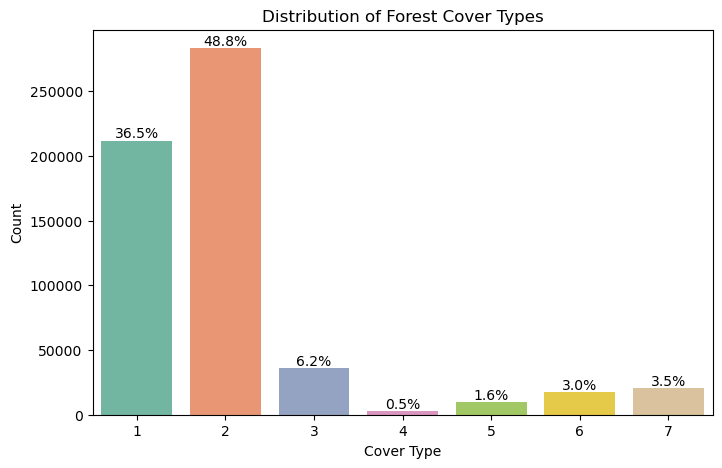

In [14]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")

# Add percentages on bars
total = len(y)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10)

plt.show()

we see that the data is imbalanced in the target variable which will cause bias towards a certain class [cover type]

## Model Training [without resampling]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scale the Features for Training

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model

In [18]:
logreg = LogisticRegression(
    random_state=42,
    multi_class="multinomial"
    )
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Accuracy: 0.7228815090832422

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.67      0.80      0.73      7151
           4       0.57      0.38      0.46       549
           5       0.13      0.00      0.01      1899
           6       0.49      0.26      0.34      3473
           7       0.73      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.58      0.50      0.52    116203
weighted avg       0.71      0.72      0.71    116203



The accuracy of LogisticRegression model is nearly 72%, which is considered a relatively good accuracy, but see what happens when we visualize our confusion matrix.

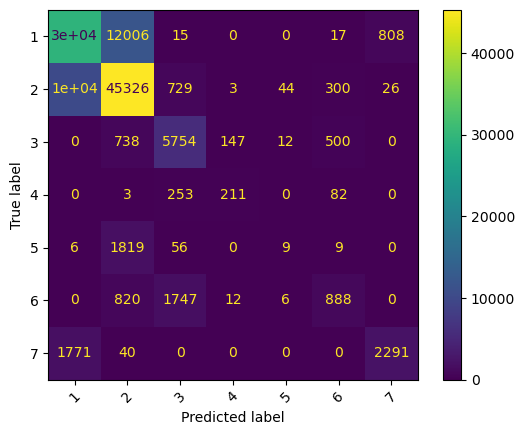

In [19]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

The confusion matrix shows an obvious bias in predicting our target variable towards 2 classes, which are 1 and 2
and that actually happens because of the Imbalanced data that we have.

## Training [with Oversampling]

In [20]:
oversampled_df = df.copy()

In [21]:
oversampled_df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

To do oversampling, we must maximize the size of our classes to the maximum one.

In [22]:
max_class_size = oversampled_df['Cover_Type'].value_counts().max()

In [23]:
# oversampling the minority classes
oversampled_df = oversampled_df.groupby('Cover_Type').apply(lambda x: x.sample(max_class_size, replace=True, random_state=42)).reset_index(drop=True)

oversampled_df['Cover_Type'].value_counts()

Cover_Type
1    283301
2    283301
3    283301
4    283301
5    283301
6    283301
7    283301
Name: count, dtype: int64

In [24]:
oversampled_X = oversampled_df.drop(columns=['Cover_Type']).copy()
oversampled_y = oversampled_df['Cover_Type'].copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    oversampled_X, oversampled_y, test_size=0.2, random_state=42, stratify=oversampled_y
)

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
oversampled_logreg = LogisticRegression(
    random_state=42,
    multi_class="multinomial"
    )
oversampled_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = oversampled_logreg.predict(X_test_scaled)

print("=== Logistic Regression on Oversampled Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression on Oversampled Data ===
Accuracy: 0.7066022560523622

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.66      0.66     56660
           2       0.61      0.52      0.56     56660
           3       0.63      0.55      0.59     56660
           4       0.81      0.88      0.84     56661
           5       0.72      0.78      0.75     56660
           6       0.61      0.66      0.64     56660
           7       0.88      0.89      0.88     56661

    accuracy                           0.71    396622
   macro avg       0.70      0.71      0.70    396622
weighted avg       0.70      0.71      0.70    396622



The accuracy is less than the previous one but still reasonable.

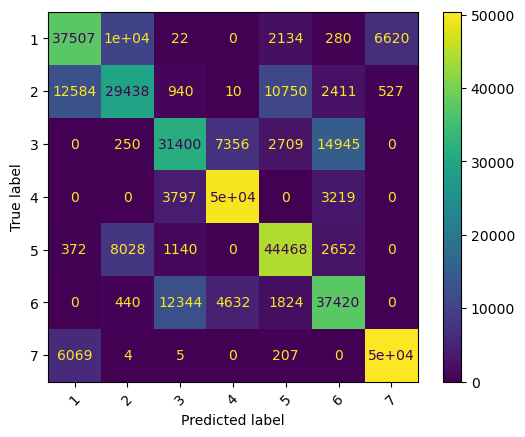

In [28]:
ConfusionMatrixDisplay.from_estimator(oversampled_logreg, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

It prefroms better on certain classes, which have high f1 score in the classification report.

## Training [with Undersampling]

In [29]:
undersampled_df = df.copy()

In [30]:
undersampled_df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

To do undersampling, all the classes should have the number of instances as the least class of them which is class 4 in our case with 2747 rows.

In [31]:
min_class_size = undersampled_df['Cover_Type'].value_counts().min()

In [32]:
# undersampling the majority classes
undersampled_df = undersampled_df.groupby('Cover_Type').apply(lambda x: x.sample(min_class_size, random_state=42)).reset_index(drop=True)

undersampled_df['Cover_Type'].value_counts()

Cover_Type
1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
7    2747
Name: count, dtype: int64

In [33]:
undersampled_X = undersampled_df.drop(columns=['Cover_Type']).copy()
undersampled_y = undersampled_df['Cover_Type'].copy()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    undersampled_X, undersampled_y, test_size=0.2, random_state=42, stratify=undersampled_y
)

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
undersampled_logreg = LogisticRegression(
    random_state=42,
    multi_class="multinomial"
    )
undersampled_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = undersampled_logreg.predict(X_test_scaled)

print("=== Logistic Regression on Undersampled Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression on Undersampled Data ===
Accuracy: 0.6861674466978679

Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.66      0.65       549
           2       0.58      0.48      0.53       549
           3       0.61      0.52      0.56       549
           4       0.79      0.86      0.82       550
           5       0.69      0.77      0.73       550
           6       0.60      0.65      0.62       549
           7       0.88      0.86      0.87       550

    accuracy                           0.69      3846
   macro avg       0.68      0.69      0.68      3846
weighted avg       0.68      0.69      0.68      3846



Accuracy is very similar to oversampling.

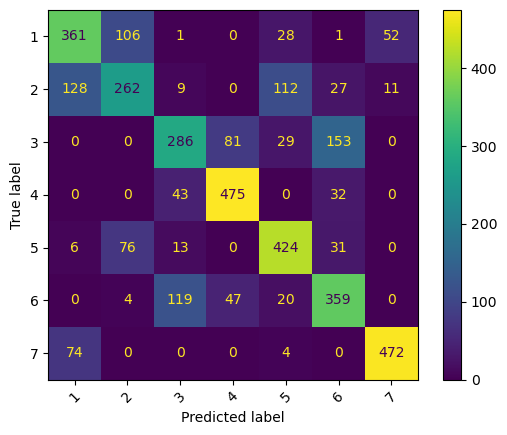

In [37]:
ConfusionMatrixDisplay.from_estimator(undersampled_logreg, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

The confusion matrix is more reasonable here that the model predicts all the classes.

## Training other Models on the Undersampled dataset

### Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8575143005720229

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.78      0.78       549
           2       0.80      0.65      0.72       549
           3       0.87      0.81      0.84       549
           4       0.92      0.98      0.95       550
           5       0.88      0.95      0.92       550
           6       0.82      0.87      0.84       549
           7       0.94      0.96      0.95       550

    accuracy                           0.86      3846
   macro avg       0.86      0.86      0.85      3846
weighted avg       0.86      0.86      0.85      3846



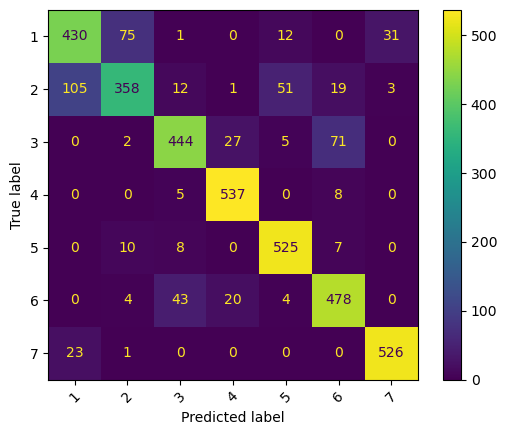

In [45]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap="viridis", xticks_rotation=45)

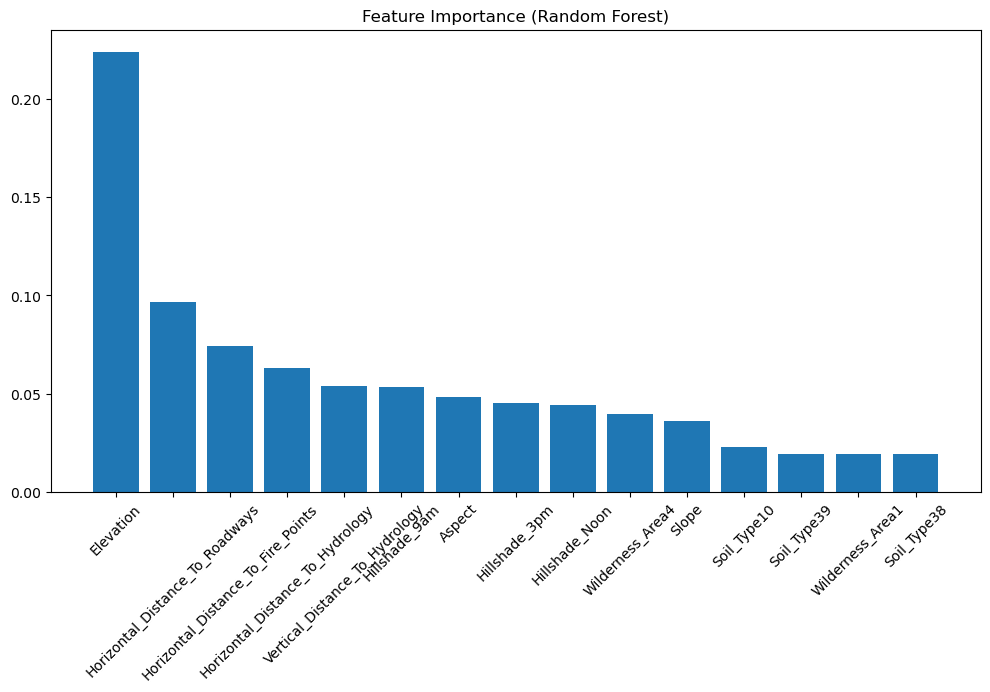

In [40]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), X.columns[indices[:15]], rotation=45)
plt.show()

### XGBoost